In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn 40, 912

#### SET DING0 SETTINGS

In [3]:
# TODO set in config file
ding0_default=False

In [4]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [5]:
create_lvgd_geo_method='convex_hull' # off, convex_hull

In [6]:
%%time

# STEP 1
nd.import_mv_grid_districts(session, mv_grid_districts_no=mv_grid_districts,
                            ding0_default=ding0_default, need_parameterization=True,
                            create_lvgd_geo_method=create_lvgd_geo_method)

Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 3.
Finding connected graph, iteration 2 of max. 4.
Finding connected graph, number of unconnected nodes is 3.
Finding connected graph, iteration 3 of max. 4.
Finding connected graph, number of unconnected nodes is 3.
Finding connected graph, iteration 4 of max. 4.
Finding connected graph, number of unconnected nodes is 3.
Finding connected graph, max. iterations 4 trespassed. Break.
Simplified graph: 2 to 2 nodes, 2 to 2 edges
Simplified graph: 3 to 2 nodes, 4 to 2 edges
all clusters are in range
Graph already fully connected.
Simplified graph: 63 to 8 nodes, 120 to 10 edges
Simplified graph: 6 to 4 nodes, 10 to 6 edges
all clusters are in range
Graph already fully connected.
Simplified graph: 35 to 4 nodes, 66 to 4 edges
Simplified graph: 6 to 2 nodes, 10 to 2 edges
all clusters are in range
Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnect

bicycle_parking is not matched in config and will be categorized as leftover
bicycle_parking is not matched in config and will be categorized as leftover


Simplified graph: 716 to 479 nodes, 1484 to 1010 edges
at least one node trespasses dist to substation.                                        cluster again with n_clusters+=1
after increment; n_cluster 5
all clusters are in range
Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 0.
Simplified graph: 27 to 16 nodes, 48 to 26 edges
Simplified graph: 64 to 35 nodes, 142 to 84 edges
all clusters are in range
Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 7.
Finding connected graph, iteration 2 of max. 4.
Finding connected graph, number of unconnected nodes is 5.
Finding connected graph, iteration 3 of max. 4.
Finding connected graph, number of unconnected nodes is 5.
Finding connected graph, iteration 4 of max. 4.
Finding connected graph, number of unconnected nodes is 5.
Finding connected graph, max. iterations 4 trespassed. Break.
Simplified graph: 80 to 37 nodes, 166 to 80 edg

shelter is not matched in config and will be categorized as leftover


Simplified graph: 366 to 268 nodes, 770 to 574 edges
all clusters are in range
Graph already fully connected.
Simplified graph: 22 to 8 nodes, 36 to 8 edges
Simplified graph: 11 to 9 nodes, 20 to 16 edges
all clusters are in range
ways_sql_df.empty. No ways found in MV mv_grid_district_40, LA 4670
Graph already fully connected.
Simplified graph: 21 to 4 nodes, 38 to 4 edges
Simplified graph: 41 to 23 nodes, 88 to 52 edges
all clusters are in range
Graph already fully connected.
Simplified graph: 56 to 6 nodes, 108 to 8 edges
buildings_w_loads_df.empty. No buildings found in MV mv_grid_district_40, LA 4735
Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 0.
Simplified graph: 29 to 15 nodes, 56 to 28 edges
Simplified graph: 5 to 4 nodes, 8 to 6 edges
all clusters are in range
Graph already fully connected.
Simplified graph: 18 to 4 nodes, 32 to 4 edges
Simplified graph: 15 to 9 nodes, 28 to 16 edges
all clusters are in range
Graph al

Wall time: 1min 41s


In [7]:
# STEP 2
nd.import_generators(session, debug=False)

Generator Generator_mvgd_40_lvgd_4347000015_solar_ground_mounted_232522 cannot be assigned to non-existent LV Grid District and was allocated to a random LV Grid District (lv_grid_district_4347000015).
Generator Generator_mvgd_40_lvgd_4347000142_gas_232523 cannot be assigned to non-existent LV Grid District and was allocated to a random LV Grid District (lv_grid_district_4347000142).
Generator Generator_mvgd_40_lvgd_4347000122_hydro_232524 has no la_id and was assigned to a random LV Grid District (lv_grid_district_4347000122).
Generator Generator_mvgd_40_lvgd_4347000247_hydro_232525 has no la_id and was assigned to a random LV Grid District (lv_grid_district_4347000247).
Generator Generator_mvgd_40_lvgd_5511000000_solar_ground_mounted_232526 cannot be assigned to non-existent LV Grid District and was allocated to a random LV Grid District (lv_grid_district_5511000000).
Generator Generator_mvgd_40_lvgd_4347000149_solar_ground_mounted_232527 cannot be assigned to non-existent LV Grid Di

In [8]:
%%time

# STEP 3
nd.mv_parametrize_grid(debug=False)

Wall time: 17.4 s


In [9]:
# STEP 4: Validate MV Grid Districts
msg = nd.validate_grid_districts()

In [10]:
# STEP 5: Build LV grids
#la = nd.build_lv_grids()
#district_0 = la._lv_grid_districts[0]
load_area, lv_grid_district_build = nd.build_lv_grids()

lv_grid_district_4488000000


In [12]:
lv_grid_district_build[0].feeder.value_counts()

1    170
2    144
3     68
Name: feeder, dtype: int64

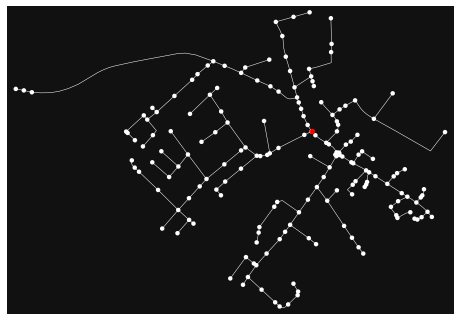

In [14]:
import osmnx as ox
c = list(load_area._lv_grid_districts[0].lv_grid._station.geo_data.coords)[0]
fig, ax = ox.plot_graph(lv_grid_district_build[2], node_size=20, edge_color='w', edge_linewidth=0.5, show=False, close=False)
ax.scatter(c[0], c[1], color = 'red', s=20)

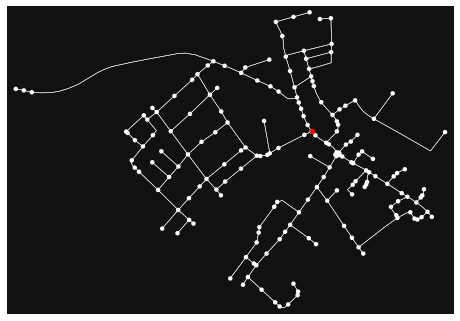

In [38]:
import osmnx as ox

fig, ax = ox.plot_graph(lvgd.graph_district, node_size=20, edge_color='w', edge_linewidth=0.5, show=False, close=False)
ax.scatter(c[0], c[1], color = 'red', s=20)

In [16]:
lv_loads_to_station

,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,osm_id_building,geometry_amenity,x,y,capacity,nn,nn_dist,nn_coords,cluster,feeder,n_residential_at_this_feeder
113729971,school,2263.00,"POLYGON ((4275820.767368784 2731206.422305302,...",POINT (4275841.978121648 2731225.391497739),Grundschule Kluftern,0.508475,1.0,NaN,NaN,4.275842e+06,2.731225e+06,140.758600,4474326634,42.574385,POINT (4275839.968844581 2731182.864553),0,0,0
8722698791,library,2831.15,"POLYGON ((4275891.680912562 2731423.106414076,...",POINT (4275910.884412572 2731398.269475583),Ortsbücherei Kluftern,0.833333,2.0,113729970.0,POINT (4275911.679142763 2731407.29853519),4.275911e+06,2.731398e+06,163.923585,1783501474,28.078869,POINT (4275884.3077884 2731389.208242491),0,0,0


In [15]:
lv_loads_grid

,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,osm_id_building,geometry_amenity,x,y,capacity,nn,nn_dist,nn_coords,cluster
121672585,residential,382.170,"POLYGON ((4275809.388605354 2731340.635632175,...",POINT (4275818.032202284 2731337.133897017),None,0.894737,1.0,NaN,NaN,4.275818e+06,2.731337e+06,1.528631,665274518,33.950329,POINT (4275794.311317536 2731312.845124395),0
448999383,detached,279.175,"POLYGON ((4275697.814849529 2731352.167064999,...",POINT (4275705.778389351 2731350.92428962),None,0.421053,1.0,NaN,NaN,4.275706e+06,2.731351e+06,0.719356,300459758,25.430404,POINT (4275716.71728975 2731327.966808951),0
448999424,detached,376.007,"POLYGON ((4275719.917427879 2731342.230661175,...",POINT (4275729.701306724 2731341.326945219),None,0.421053,1.0,NaN,NaN,4.275730e+06,2.731341e+06,0.719356,300459758,18.630028,POINT (4275716.71728975 2731327.966808951),0
626691546,residential,240.631,"POLYGON ((4275864.472052322 2730718.332611816,...",POINT (4275871.895833699 2730718.544570929),None,0.551724,1.0,NaN,NaN,4.275872e+06,2.730719e+06,0.942604,2274291202,14.903185,POINT (4275877.833172197 2730732.213987042),0
626691548,residential,184.125,"POLYGON ((4275848.920339894 2730738.149194021,...",POINT (4275854.745781151 2730738.366961468),None,0.545455,1.0,NaN,NaN,4.275855e+06,2.730738e+06,0.931893,300459659,12.904010,POINT (4275867.035048964 2730742.302362509),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654100071,post_office,574.029,"POLYGON ((4276130.776608285 2731064.378511491,...",POINT (4276142.772074205 2731061.310943093),None,0.282051,2.0,262744435.0,POINT (4276135.475661288 2731062.996035025),4.276143e+06,2.731061e+06,18.627241,8176291653,17.844994,POINT (4276154.966093399 2731048.282139846),0
4459496890,doctors,687.592,"POLYGON ((4275884.391113992 2731271.221242209,...",POINT (4275895.052859105 2731262.686747113),Familienpraxis Dres. Schwandt und Sattler,0.606061,2.0,218151776.0,POINT (4275892.265823434 2731270.601722264),4.275895e+06,2.731263e+06,37.576903,309954770,19.008394,POINT (4275913.964417676 2731264.602995879),0
7070570659,dentist,1125.660,"POLYGON ((4276151.601491779 2731041.664376348,...",POINT (4276168.580419609 2731043.466297819),Dr. Iness Wolff,0.421053,2.0,262744436.0,POINT (4276158.259966475 2731041.08838786),4.276169e+06,2.731043e+06,61.517319,8176291654,13.712944,POINT (4276163.207613003 2731056.082865863),0
7070570660,dentist,686.819,"POLYGON ((4275915.856414391 2731153.94636323, ...",POINT (4275928.772407055 2731156.167824962),Dr. Schwarzott,0.472727,2.0,263205250.0,POINT (4275929.225074813 2731164.160887213),4.275929e+06,2.731156e+06,37.534658,300459724,11.437707,POINT (4275937.774983471 2731149.112702852),0


### checking unique ways and not di-graph

In [ ]:
import osmnx as ox
import networkx as nx
edges = ox.graph_to_gdfs(lvgd.graph_district, nodes=False, edges=True)
edges

,,,length,highway,osmid,geometry
u,v,key,,,,
29585231,2923114678,0,39.462243,residential,37528126,"LINESTRING (4284444.248 2725229.780, 4284454.9..."
2923114678,29585231,0,39.462243,residential,37528126,"LINESTRING (4284444.248 2725229.780, 4284454.9..."


In [19]:
%%time

edges = ox.graph_to_gdfs(nx.MultiGraph(lvgd.graph_district), nodes=False, edges=True)
edges

Wall time: 43 ms


,,,length,highway,osmid,geometry
u,v,key,,,,
29585231,2923114678,0,39.462243,residential,37528126,"LINESTRING (4284444.248 2725229.780, 4284454.9..."


In [21]:
%%time

gg = ox.utils_graph.get_undirected(lvgd.graph_district)
edges = ox.graph_to_gdfs(gg, nodes=False, edges=True)
edges

Wall time: 164 ms


,,,length,highway,osmid,geometry,from,to
u,v,key,,,,,,
29585231,2923114678,0,39.462243,residential,37528126,"LINESTRING (4284444.248 2725229.780, 4284454.9...",2923114678,29585231
